In [0]:
# url = "https://drive.google.com/uc?export=download&confirm=lM3c&id=1-1vbHhydACIncmtEqP1e2BkYWNQhGbG7"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [33]:
link = "https://drive.google.com/open?id=1-1vbHhydACIncmtEqP1e2BkYWNQhGbG7"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1-1vbHhydACIncmtEqP1e2BkYWNQhGbG7


In [34]:
start = time.time()
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
train = pd.read_csv('Filename.csv')
end = time.time()
print("Time taken is ", end-start)
train.head()

Time taken is  20.832613945007324


,Unnamed: 0,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,OsPlatformSubRelease,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,50,165,17134,1,175,1804,10,0,0,273,1735,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,256,4,1.0,137.0,5,1.0,2,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0,299451.0,0,4096.0,16,18.9,1440.0,1,7,4.294967e+09,0,165,12,6,26.0,5,1,2,4,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,1,50,1,17134,1,175,1804,10,0,0,263,48,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,256,4,1.0,137.0,5,1.0,7,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0,102385.0,0,4096.0,28,13.9,1366.0,3,7,1.000000e+00,0,1,12,2,8.0,5,2,2,1,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,2,50,165,17134,1,175,1804,10,0,0,273,1341,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,768,4,1.0,137.0,11,1.0,2,4909.0,317701.0,4.0,5.0,1972.0,114473.0,1,113907.0,0,4096.0,16,21.5,1920.0,1,7,4.294967e+09,0,165,2,6,7.0,2,1,1,4,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,3,50,228,17134,1,175,1804,10,0,0,273,1527,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,115,256,4,1.0,137.0,4,1.0,2,1443.0,275890.0,4.0,5.0,2273.0,238475.0,2,227116.0,0,4096.0,26,18.5,1366.0,1,7,4.294967e+09,0,228,12,6,17.0,2,1,1,4,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,4,50,191,17134,1,175,1804,10,0,0,273,1379,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,75,768,4,1.0,137.0,11,1.0,7,1443.0,331929.0,4.0,5.0,2500.0,476940.0,0,101900.0,0,6144.0,31,14.0,1366.0,3,30,0.000000e+00,0,191,2,7,8.0,2,1,2,4,355.0,19844.0,0,0,0,0.0,0.0,1.0,1


In [35]:
train = train.drop(train.columns[[0]], axis=1) 
train.head()

,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,OsPlatformSubRelease,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,50,165,17134,1,175,1804,10,0,0,273,1735,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,256,4,1.0,137.0,5,1.0,2,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0,299451.0,0,4096.0,16,18.9,1440.0,1,7,4.294967e+09,0,165,12,6,26.0,5,1,2,4,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,50,1,17134,1,175,1804,10,0,0,263,48,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,256,4,1.0,137.0,5,1.0,7,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0,102385.0,0,4096.0,28,13.9,1366.0,3,7,1.000000e+00,0,1,12,2,8.0,5,2,2,1,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,50,165,17134,1,175,1804,10,0,0,273,1341,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,768,4,1.0,137.0,11,1.0,2,4909.0,317701.0,4.0,5.0,1972.0,114473.0,1,113907.0,0,4096.0,16,21.5,1920.0,1,7,4.294967e+09,0,165,2,6,7.0,2,1,1,4,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,50,228,17134,1,175,1804,10,0,0,273,1527,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,115,256,4,1.0,137.0,4,1.0,2,1443.0,275890.0,4.0,5.0,2273.0,238475.0,2,227116.0,0,4096.0,26,18.5,1366.0,1,7,4.294967e+09,0,228,12,6,17.0,2,1,1,4,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,50,191,17134,1,175,1804,10,0,0,273,1379,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,75,768,4,1.0,137.0,11,1.0,7,1443.0,331929.0,4.0,5.0,2500.0,476940.0,0,101900.0,0,6144.0,31,14.0,1366.0,3,30,0.000000e+00,0,191,2,7,8.0,2,1,2,4,355.0,19844.0,0,0,0,0.0,0.0,1.0,1


In [36]:
link = "https://drive.google.com/open?id=1-45mBdl_NZ5y86tV2t5YuHCI5xYPoKzi"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1-45mBdl_NZ5y86tV2t5YuHCI5xYPoKzi


In [37]:
start = time.time()
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
test = pd.read_csv('Filename.csv')
end = time.time()
print("Time taken is ",end-start)
test.head()

Time taken is  20.557023763656616


,Unnamed: 0,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,OsPlatformSubRelease,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,1000000,50,254,17134,1,175,1804,10,0,0,275,938,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,171,124736.0,0.0,211.0,182,768,4,1.0,137.0,5,1.0,2,4589.0,313586.0,4.0,5.0,3478.0,114473.0,1,113858.0,0,4096.0,16,21.5,1920.0,1,7,4.294967e+09,0,254,2,2,29.0,2,1,1,4,142.0,11216.0,0,0,0,0.0,0.0,3.0,0
1,1000001,19,2189,14393,2189,171,1711,10,0,0,273,488,18,1806,18062,18,1806,18062,7.0,0,48510.0,2.0,1.0,1,29,95010.0,0.0,35.0,171,768,1,1.0,98.0,11,1.0,7,4395.0,273338.0,2.0,5.0,1984.0,476940.0,0,466913.0,0,4096.0,28,14.0,1366.0,3,30,0.000000e+00,0,2189,5,7,26.0,2,1,2,4,142.0,4357.0,1,0,0,0.0,1.0,10.0,1
2,1000002,50,1,17134,1,175,1804,10,0,0,275,1769,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,201,66202.0,27.0,267.0,251,768,4,1.0,137.0,5,1.0,7,2230.0,253149.0,2.0,5.0,2097.0,29820.0,1,29252.0,0,3072.0,21,13.3,1920.0,3,7,0.000000e+00,0,1,5,2,35.0,5,1,0,1,142.0,43534.0,0,0,0,0.0,0.0,11.0,1
3,1000003,42,547,16299,431,182,1908,10,0,0,275,1380,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,27.0,117.0,115,768,3,1.0,117.0,11,1.0,7,585.0,189830.0,4.0,5.0,2527.0,122106.0,1,108182.0,1,4096.0,28,13.4,1920.0,3,30,0.000000e+00,0,547,2,7,8.0,0,1,2,4,556.0,64729.0,1,1,0,0.0,0.0,3.0,0
4,1000004,2,962,10586,962,122,2241,10,0,0,267,1310,9,10586,962,9,10586,962,7.0,0,53447.0,1.0,1.0,1,68,33702.0,27.0,276.0,74,768,6,1.0,92.0,11,1.0,7,2206.0,251667.0,2.0,5.0,1985.0,29820.0,1,21148.0,0,2048.0,28,13.2,1366.0,3,30,0.000000e+00,0,962,2,5,7.0,5,1,2,4,554.0,33041.0,1,0,0,0.0,0.0,12.0,0


In [38]:
test = test.drop(test.columns[[0]], axis=1) 
test.head()

,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,OsPlatformSubRelease,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,50,254,17134,1,175,1804,10,0,0,275,938,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,171,124736.0,0.0,211.0,182,768,4,1.0,137.0,5,1.0,2,4589.0,313586.0,4.0,5.0,3478.0,114473.0,1,113858.0,0,4096.0,16,21.5,1920.0,1,7,4.294967e+09,0,254,2,2,29.0,2,1,1,4,142.0,11216.0,0,0,0,0.0,0.0,3.0,0
1,19,2189,14393,2189,171,1711,10,0,0,273,488,18,1806,18062,18,1806,18062,7.0,0,48510.0,2.0,1.0,1,29,95010.0,0.0,35.0,171,768,1,1.0,98.0,11,1.0,7,4395.0,273338.0,2.0,5.0,1984.0,476940.0,0,466913.0,0,4096.0,28,14.0,1366.0,3,30,0.000000e+00,0,2189,5,7,26.0,2,1,2,4,142.0,4357.0,1,0,0,0.0,1.0,10.0,1
2,50,1,17134,1,175,1804,10,0,0,275,1769,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,201,66202.0,27.0,267.0,251,768,4,1.0,137.0,5,1.0,7,2230.0,253149.0,2.0,5.0,2097.0,29820.0,1,29252.0,0,3072.0,21,13.3,1920.0,3,7,0.000000e+00,0,1,5,2,35.0,5,1,0,1,142.0,43534.0,0,0,0,0.0,0.0,11.0,1
3,42,547,16299,431,182,1908,10,0,0,275,1380,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,27.0,117.0,115,768,3,1.0,117.0,11,1.0,7,585.0,189830.0,4.0,5.0,2527.0,122106.0,1,108182.0,1,4096.0,28,13.4,1920.0,3,30,0.000000e+00,0,547,2,7,8.0,0,1,2,4,556.0,64729.0,1,1,0,0.0,0.0,3.0,0
4,2,962,10586,962,122,2241,10,0,0,267,1310,9,10586,962,9,10586,962,7.0,0,53447.0,1.0,1.0,1,68,33702.0,27.0,276.0,74,768,6,1.0,92.0,11,1.0,7,2206.0,251667.0,2.0,5.0,1985.0,29820.0,1,21148.0,0,2048.0,28,13.2,1366.0,3,30,0.000000e+00,0,962,2,5,7.0,5,1,2,4,554.0,33041.0,1,0,0,0.0,0.0,12.0,0


In [39]:
print(train.shape)
print(test.shape)

(1000000, 69)
(1000000, 69)


In [40]:
train = train.to_numpy()
print(train.shape)

(1000000, 69)


In [41]:
test=test.to_numpy()
test_unseen = test[500000:,:]
test = test[0:500000,:]
print(test.shape)

(500000, 69)


In [42]:
train_features = train[:,:-1]
print(train_features.shape)
train_labels = train[:,-1]
print(train_labels.shape)

print(train_labels[0:5])

(1000000, 68)
(1000000,)
[0. 0. 0. 1. 1.]


In [52]:
test_features = test[:,:-1]
print(test_features.shape)
test_labels = test[:,-1]
print(test_labels.shape)

test_unseen_features = test_unseen[:,:-1]
print(test_unseen_features.shape)
test_unseen_labels = test_unseen[:,-1]
print(test_unseen_labels.shape)
print(test_unseen_labels[0:5])

(500000, 68)
(500000,)
(500000, 68)
(500000,)
[0. 1. 0. 0. 1.]


In [0]:
# # Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# # Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 100, random_state = 42,verbose=1)
# # Train the model on training data
# rf.fit(train_features, train_labels);

In [0]:
# # Use the forest's predict method on the test data
# predictions = rf.predict(test_features)
# # Calculate the absolute errors
# errors = abs(predictions - test_labels)
# print(errors.sum()/len(test_labels))
# # Print out the mean absolute error (mae)
# # print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# # Mean Absolute Error: 3.83 degrees.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.4479994900000002


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.1s finished


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_labels)
# preds = clf.predict(test_features)
predictions = clf.predict(test_features)
# # Calculate the absolute errors
errors = abs(predictions - test_labels)
print(errors.sum()/len(test_labels))

0.428259


In [0]:

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)
# # Calculate the absolute errors
errors = abs(predictions - test_labels)
print(errors.sum()/len(test_labels))

0.427454


In [0]:

clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=4000, min_samples_leaf = 1000)
clf = clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)
# # Calculate the absolute errors
errors = abs(predictions - test_labels)
print(errors.sum()/len(test_labels))

0.365574


In [0]:
i=2
dic = {}
while i < 2000:
  start = time.time()
  print("Started for i = ",i)
  clf = tree.DecisionTreeClassifier( min_samples_split=i)
  clf = clf.fit(train_features, train_labels)
  print("Train done")
  predictions = clf.predict(train_features)
  # # Calculate the absolute errors
  errors = abs(predictions - train_labels)

  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Train Accuracy is ",accuracy)
  
  # print("Train accuracy = ")
  predictions = clf.predict(test_features)
  # # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Test Accuracy is ",accuracy)
  end = time.time()
  dic[i]=accuracy
  print("Time taken was: ",end-start,"\n")
  i = i+100

Started for i =  2
Train done
i =  2
Train Accuracy is  99.9988
i =  2
Test Accuracy is  57.1773
Time taken was:  70.08756589889526 

Started for i =  102
Train done
i =  102
Train Accuracy is  72.6028
i =  102
Test Accuracy is  60.5702
Time taken was:  55.7715380191803 

Started for i =  202
Train done
i =  202
Train Accuracy is  69.4489
i =  202
Test Accuracy is  61.8671
Time taken was:  52.36076498031616 

Started for i =  302
Train done
i =  302
Train Accuracy is  68.0613
i =  302
Test Accuracy is  62.517
Time taken was:  49.759192943573 

Started for i =  402
Train done
i =  402
Train Accuracy is  67.28739999999999
i =  402
Test Accuracy is  62.8014
Time taken was:  48.170947790145874 

Started for i =  502
Train done
i =  502
Train Accuracy is  66.7672
i =  502
Test Accuracy is  62.986
Time taken was:  47.604013442993164 

Started for i =  602
Train done
i =  602
Train Accuracy is  66.3597
i =  602
Test Accuracy is  63.174
Time taken was:  47.82840275764465 

Started for i =  702

In [0]:
i=2002
while i < 3003:
  start = time.time()
  print("Started for i = ",i)
  clf = tree.DecisionTreeClassifier( min_samples_split=i)
  clf = clf.fit(train_features, train_labels)
  print("Train done")
  predictions = clf.predict(train_features)
  # # Calculate the absolute errors
  errors = abs(predictions - train_labels)

  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Train Accuracy is ",accuracy)
  
  # print("Train accuracy = ")
  predictions = clf.predict(test_features)
  # # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Test Accuracy is ",accuracy)
  end = time.time()
  dic[i]=accuracy
  print("Time taken was: ",end-start,"\n")
  i = i+100

Started for i =  2002
Train done
i =  2002
Train Accuracy is  64.65520000000001
i =  2002
Test Accuracy is  63.6024
Time taken was:  39.585474491119385 

Started for i =  2102
Train done
i =  2102
Train Accuracy is  64.6356
i =  2102
Test Accuracy is  63.6083
Time taken was:  39.467264890670776 

Started for i =  2202
Train done
i =  2202
Train Accuracy is  64.5954
i =  2202
Test Accuracy is  63.6139
Time taken was:  38.634772300720215 

Started for i =  2302
Train done
i =  2302
Train Accuracy is  64.565
i =  2302
Test Accuracy is  63.5886
Time taken was:  39.02956557273865 

Started for i =  2402
Train done
i =  2402
Train Accuracy is  64.5409
i =  2402
Test Accuracy is  63.6066
Time taken was:  38.88241791725159 

Started for i =  2502
Train done
i =  2502
Train Accuracy is  64.52170000000001
i =  2502
Test Accuracy is  63.6024
Time taken was:  38.303566217422485 

Started for i =  2602
Train done
i =  2602
Train Accuracy is  64.5013
i =  2602
Test Accuracy is  63.5999
Time taken wa

In [0]:
print(dic)

{2002: 63.6024, 2102: 63.6083, 2202: 63.6139, 2302: 63.5886, 2402: 63.6066, 2502: 63.6024, 2602: 63.5999, 2702: 63.6023, 2802: 63.6013, 2902: 63.6065, 3002: 63.6027}


In [0]:
dic[2]=57.1773
dic[102]=60.5702
dic[202]=61.8671
dic[302]=62.517
dic[402]=62.8014
dic[502]=62.986
dic[602]=63.174
dic[702]=63.2668
dic[802]=63.3361
dic[902]=63.4122
dic[1002]=63.452
dic[1102]=63.5065
dic[1202]=63.5115
dic[1302]=63.5464
dic[1402]=63.5584
dic[1502]=63.5856
dic[1602]=63.5956
dic[1702]=63.6076
dic[1802]=63.5901
dic[1902]=63.5919
print(dic)

{2002: 63.6024, 2102: 63.6083, 2202: 63.6139, 2302: 63.5886, 2402: 63.6066, 2502: 63.6024, 2602: 63.5999, 2702: 63.6023, 2802: 63.6013, 2902: 63.6065, 3002: 63.6027, 2: 57.1773, 102: 60.5702, 202: 61.8671, 302: 62.517, 402: 62.8014, 502: 62.986, 602: 63.174, 702: 63.2668, 802: 63.3361, 902: 63.4122, 1002: 63.452, 1102: 63.5065, 1202: 63.5115, 1302: 63.5464, 1402: 63.5584, 1502: 63.5856, 1602: 63.5956, 1702: 63.6076, 1802: 63.5901, 1902: 63.5919}


In [0]:
x_test_acc = []
y_test_acc = []
j=0
i=2
while i< 3003:
  x_test_acc.append(i)
  y_test_acc.append(dic[i])
  # j=j+1
  i=i+100
print(x_test_acc)

[2, 102, 202, 302, 402, 502, 602, 702, 802, 902, 1002, 1102, 1202, 1302, 1402, 1502, 1602, 1702, 1802, 1902, 2002, 2102, 2202, 2302, 2402, 2502, 2602, 2702, 2802, 2902, 3002]


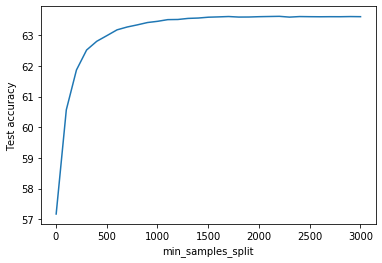

In [0]:
plt.plot(x_test_acc,y_test_acc)
plt.xlabel('min_samples_split')
plt.ylabel('Test accuracy')
plt.show()

In [0]:
train_dic={}
train_dic[2]=99.9988
train_dic[102]=72.6028
train_dic[202]=69.4489
train_dic[302]=68.0613
train_dic[402]=67.2873999999999
train_dic[502]=66.7672
train_dic[602]=66.3597
train_dic[702]=66.048
train_dic[802]=65.8227
train_dic[902]=65.6375
train_dic[1002]=65.4887
train_dic[1102]=65.3428
train_dic[1202]=65.2315
train_dic[1302]=65.1174
train_dic[1402]=65.0305999999999
train_dic[1502]=64.9431
train_dic[1602]=64.8723
train_dic[1702]=64.7988
train_dic[1802]=64.7425
train_dic[1902]=64.6871999999999
train_dic[2002]=64.6552
train_dic[2102]=64.6356
train_dic[2202]=64.5954
train_dic[2302]=64.565
train_dic[2402]=64.5409
train_dic[2502]=64.5217
train_dic[2602]=64.5013
train_dic[2702]=64.4917
train_dic[2802]=64.4537
train_dic[2902]=64.4380999999999
train_dic[3002]=64.4203

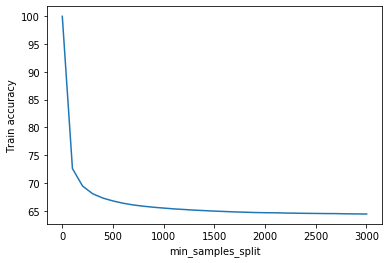

In [0]:
x_train_acc = []
y_train_acc = []
j=0
i=2
while i< 3003:
  x_train_acc.append(i)
  y_train_acc.append(train_dic[i])
  # j=j+1
  i=i+100
# print(x_test_acc)
plt.plot(x_train_acc,y_train_acc)
plt.xlabel('min_samples_split')
plt.ylabel('Train accuracy')
plt.show()

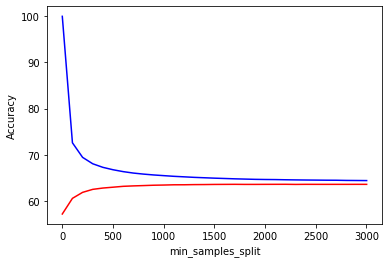

In [0]:
plt.plot(x_train_acc, y_train_acc, 'b-', label="Train Accuracy")
plt.plot(x_train_acc, y_test_acc, 'r-', label="Test Accuracy")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.show()


In [0]:
i=1
dic_for_leaf = {}
train_acc_leaf=[]
test_acc_leaf=[]
while i < 3002:
  start = time.time()
  print("Started for i = ",i)
  clf = tree.DecisionTreeClassifier( min_samples_split=1100, min_samples_leaf=i)
  clf = clf.fit(train_features, train_labels)
  print("Train done")
  predictions = clf.predict(train_features)
  # # Calculate the absolute errors
  errors = abs(predictions - train_labels)

  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Train Accuracy is ",accuracy)
  train_acc_leaf.append(accuracy)
  # print("Train accuracy = ")
  predictions = clf.predict(test_features)
  # # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  print("i = ",i)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  print("Test Accuracy is ",accuracy)
  test_acc_leaf.append(accuracy)
  end = time.time()
  dic_for_leaf[i]=accuracy
  print("Time taken was: ",end-start,"\n")
  i = i+100

Started for i =  1
Train done
i =  1
Train Accuracy is  65.3423
i =  1
Test Accuracy is  63.5071
Time taken was:  48.93470764160156 

Started for i =  101
Train done
i =  101
Train Accuracy is  65.03139999999999
i =  101
Test Accuracy is  63.6472
Time taken was:  44.96592998504639 

Started for i =  201
Train done
i =  201
Train Accuracy is  64.8762
i =  201
Test Accuracy is  63.5941
Time taken was:  43.36420035362244 

Started for i =  301
Train done
i =  301
Train Accuracy is  64.7841
i =  301
Test Accuracy is  63.5949
Time taken was:  42.52234411239624 

Started for i =  401
Train done
i =  401
Train Accuracy is  64.7037
i =  401
Test Accuracy is  63.601
Time taken was:  41.90503692626953 

Started for i =  501
Train done
i =  501
Train Accuracy is  64.6315
i =  501
Test Accuracy is  63.5804
Time taken was:  42.077478647232056 

Started for i =  601
Train done
i =  601
Train Accuracy is  64.4825
i =  601
Test Accuracy is  63.5297
Time taken was:  41.62530303001404 

Started for i = 

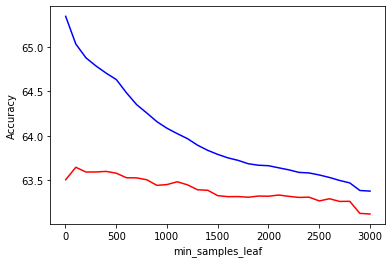

In [0]:
plt.plot(x_train_acc, train_acc_leaf, 'b-', label="Train Accuracy")
plt.plot(x_train_acc, test_acc_leaf, 'r-', label="Test Accuracy")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()


In [0]:
print("Best parameters are min_samples_leaf = 100, min_samples_split = 1100")

Best parameters are min_samples_leaf = 100, min_samples_split = 1100


In [0]:
print("Comparing entropy vs gini index for the best parameters")
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=1100, min_samples_leaf=100)
clf = clf.fit(train_features, train_labels)
print("Train done for gini")
predictions = clf.predict(train_features)
# # Calculate the absolute errors
errors = abs(predictions - train_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
print("Train Accuracy is ",accuracy)
# train_acc_leaf.append(accuracy)
# print("Train accuracy = ")
predictions = clf.predict(test_features)
# # Calculate the absolute errors
errors = abs(predictions - test_labels)
print("i = ",i)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
print("Test Accuracy is ",accuracy)

clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=1100, min_samples_leaf=100)
clf = clf.fit(train_features, train_labels)
print("Train done for entropy")
predictions = clf.predict(train_features)
# # Calculate the absolute errors
errors = abs(predictions - train_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
print("Train Accuracy is ",accuracy)
# train_acc_leaf.append(accuracy)
# print("Train accuracy = ")
predictions = clf.predict(test_features)
# # Calculate the absolute errors
errors = abs(predictions - test_labels)
print("i = ",i)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
print("Test Accuracy is ",accuracy)


Comparing entropy vs gini index for the best parameters
Train done for gini
Train Accuracy is  65.0322
i =  3101
Test Accuracy is  63.6425
Train done for entropy
Train Accuracy is  65.0467
i =  3101
Test Accuracy is  63.6431


In [0]:
print("reached here")

reached here


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn import tree
seed = 1075
np.random.seed(seed)
# Create classifiers
dt = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=1100, min_samples_leaf=100)
et = ExtraTreesClassifier()




In [17]:
clf_et = BaggingClassifier(base_estimator=et,n_estimators=40, random_state=0,verbose=1).fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.4s finished


In [0]:
clf_et_pred = clf_et.predict(test_features)
errors = abs(clf_et_pred - test_labels)
# print("i = ",i)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
print("Accuracy of ExtraTrees bagging is ",accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of ExtraTrees bagging is  61.7788


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.0min finished


In [0]:
acc=[]

In [24]:

for i in range(10,1000,50):
  print("i = ",i)
  start = time.time()
  clf_dt = BaggingClassifier(base_estimator=dt,n_estimators=i, random_state=0,verbose=0).fit(train_features, train_labels)
  clf_dt_pred = clf_dt.predict(test_features)
  errors = abs(clf_dt_pred - test_labels)
  accuracy=100*errors.sum()/len(test_labels)
  accuracy = 100 - accuracy
  acc.append(accuracy)
  print("Accuracy of DecisionTrees bagging is ",accuracy)
  end=time.time()
  print("Time taken is: ",end-start,"\n")

i =  10
Accuracy of DecisionTrees bagging is  61.9302
Time taken is:  2.4011456966400146 

i =  60
Accuracy of DecisionTrees bagging is  62.2906
Time taken is:  14.618911981582642 

i =  110
Accuracy of DecisionTrees bagging is  62.2922
Time taken is:  26.890968561172485 

i =  160
Accuracy of DecisionTrees bagging is  62.2846
Time taken is:  39.075228452682495 

i =  210
Accuracy of DecisionTrees bagging is  62.2396
Time taken is:  50.86843466758728 

i =  260
Accuracy of DecisionTrees bagging is  62.2644
Time taken is:  63.27138543128967 

i =  310
Accuracy of DecisionTrees bagging is  62.2362
Time taken is:  74.9863133430481 

i =  360
Accuracy of DecisionTrees bagging is  62.2238
Time taken is:  87.34369683265686 

i =  410
Accuracy of DecisionTrees bagging is  62.2358
Time taken is:  98.84075045585632 

i =  460
Accuracy of DecisionTrees bagging is  62.2458
Time taken is:  111.35277462005615 

i =  510
Accuracy of DecisionTrees bagging is  62.226
Time taken is:  123.3651831150055 

KeyboardInterrupt: ignored

In [26]:
print(acc)
xparams=[]
for i in range(10,600,50):
  xparams.append(i)
print(xparams)

[61.9302, 62.2906, 62.2922, 62.2846, 62.2396, 62.2644, 62.2362, 62.2238, 62.2358, 62.2458, 62.226, 62.2256]
[10, 60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560]


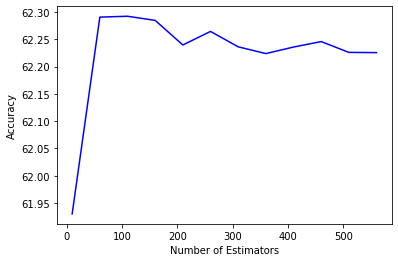

In [27]:
plt.plot(xparams, acc, 'b-', label="Test Accuracy")
# plt.plot(x_train_acc, test_acc_leaf, 'r-', label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()


In [14]:
print("reached here")

reached here


In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(train_features, label=train_labels)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 100
params['min_data'] = 200
params['max_depth'] = 50
clf = lgb.train(params, d_train, 100)

In [0]:
#Prediction
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [18]:
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Accuracy of lightgbm bagging is  63.3462


Increased learning rate , 
Decreased min_data_in_leaf

In [19]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 100
params['min_data'] = 50
params['max_depth'] = 50

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Accuracy of lightgbm bagging is  65.26740000000001


Changed num_leaves to 128

In [20]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)
start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 128
params['min_data'] = 50
params['max_depth'] = 50

clf = lgb.train(params, d_train, 100)
#Prediction
end=time.time()
print("Train done")
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train done
Accuracy of lightgbm bagging is  65.4212


Increased num_leaves to 256

In [21]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 50
print("Train start")
clf = lgb.train(params, d_train, 100)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  54.90512251853943
Accuracy of lightgbm bagging is  65.7338


Decreased max_depth to 32

In [22]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 32
print("Train start")
clf = lgb.train(params, d_train, 100)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  55.00193738937378
Accuracy of lightgbm bagging is  65.7338


Max_depth 64

In [23]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
print("Train start")
clf = lgb.train(params, d_train, 100)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  54.77683711051941
Accuracy of lightgbm bagging is  65.7338


Added bagging of trees after every 5 iteration

In [24]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
params['bagging_freq'] = 5
params['bagging_seed'] = 10

print("Train start")
clf = lgb.train(params, d_train, 100)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  53.59838557243347
Accuracy of lightgbm bagging is  65.7338


Increasing number of iterations to 150

In [25]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
params['bagging_freq'] = 5
params['bagging_seed'] = 10

print("Train start")
clf = lgb.train(params, d_train, 150)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  77.79688000679016
Accuracy of lightgbm bagging is  66.11359999999999


Increased iterations to 256

In [26]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
params['bagging_freq'] = 5
params['bagging_seed'] = 10

print("Train start")
clf = lgb.train(params, d_train, 256)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  105.95250797271729
Accuracy of lightgbm bagging is  66.27199999999999


Changing learning rate to 0.1, iterations to 512

In [27]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
params['bagging_freq'] = 5
params['bagging_seed'] = 10

print("Train start")
clf = lgb.train(params, d_train, 512)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  123.15457344055176
Accuracy of lightgbm bagging is  66.1674


Learning rate back to 0.05, iterations 512

In [28]:
# import lightgbm as lgb
# d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 50
params['max_depth'] = 64
params['bagging_freq'] = 5
params['bagging_seed'] = 10

print("Train start")
clf = lgb.train(params, d_train, 512)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  157.92975568771362
Accuracy of lightgbm bagging is  66.3928


Min_data 128, max_depth 64, bagging_freq 16

In [45]:
import lightgbm as lgb
d_train = lgb.Dataset(train_features, label=train_labels)

start=time.time()
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['device_type '] = 'gpu'
params['metric'] = 'binary_logloss'
params['num_leaves'] = 256
params['min_data'] = 128
params['max_depth'] = 64
params['bagging_freq'] = 8
params['bagging_seed'] = 16

print("Train start")
clf = lgb.train(params, d_train, 1024)
#Prediction
end=time.time()
print("Train done, time taken to train = ", end-start)
y_pred=clf.predict(test_features)
#convert into binary values
for i in range(len(test_labels)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
errors = abs(y_pred - test_labels)
accuracy=100*errors.sum()/len(test_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm bagging is ",accuracy)


Train start
Train done, time taken to train =  256.5903670787811
Accuracy of lightgbm bagging is  66.4564


In [53]:
y_pred1=clf.predict(test_unseen_features)
#convert into binary values
for i in range(len(test_unseen_labels)):
    if y_pred1[i]>=.5:       # setting threshold to .5
       y_pred1[i]=1
    else:  
       y_pred1[i]=0
errors = abs(y_pred1 - test_unseen_labels)
accuracy=100*errors.sum()/len(test_unseen_labels)
accuracy = 100 - accuracy
# acc.append(accuracy)
print("Accuracy of lightgbm for completely unseen data is ",accuracy)


Accuracy of lightgbm for completely unseen data is  66.4106
